# Data preprocessing

 Currently, the dataset contains two directories with images: first one with original imagees, second with images resized to 512x512 resolution. Because of lack of computational power I've decided to resize each image to 256x256 resolution and use them in the further learning.

In [7]:
import cv2
import pandas as pd

In [84]:
df = pd.read_csv('./data/full_df.csv')
df

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,4686,63,Male,4686_left.jpg,4686_right.jpg,severe nonproliferative retinopathy,proliferative diabetic retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4686_left.jpg
6388,4688,42,Male,4688_left.jpg,4688_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4688_left.jpg
6389,4689,54,Male,4689_left.jpg,4689_right.jpg,mild nonproliferative retinopathy,normal fundus,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4689_left.jpg
6390,4690,57,Male,4690_left.jpg,4690_right.jpg,mild nonproliferative retinopathy,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4690_left.jpg


#### Take a look into physicians' eye diagnoses

In [85]:
df['Left-Diagnostic Keywords'].unique()

array(['cataract', 'normal fundus',
       'laser spot，moderate non proliferative retinopathy',
       'macular epiretinal membrane',
       'moderate non proliferative retinopathy', 'drusen',
       'epiretinal membrane',
       'moderate non proliferative retinopathy，hypertensive retinopathy',
       'pathological myopia', 'mild nonproliferative retinopathy',
       'hypertensive retinopathy',
       'macular epiretinal membrane，mild nonproliferative retinopathy',
       'macular hole', 'wet age-related macular degeneration',
       'moderate non proliferative retinopathy，laser spot',
       'moderate non proliferative retinopathy，myelinated nerve fibers',
       'dry age-related macular degeneration',
       'epiretinal membrane，myelinated nerve fibers',
       'diabetic retinopathy', 'epiretinal membrane，lens dust', 'atrophy',
       'laser spot，white vessel，moderate non proliferative retinopathy',
       'chorioretinal atrophy',
       'moderate non proliferative retinopathy，catar

#### There are diagnoses not associated with medical disease such as `optic disk photographically invisible`, `lens dust`. They might worsen model accuracy and ability to learn so for now getting rid of them seems to be a good option.

In [86]:
df[(df['Left-Diagnostic Keywords'] == 'optic disk photographically invisible') | (df['Right-Diagnostic Keywords'] == 'optic disk photographically invisible')]

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
429,494,49,Female,494_left.jpg,494_right.jpg,optic disk photographically invisible,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",494_right.jpg
1022,1254,77,Female,1254_left.jpg,1254_right.jpg,optic disk photographically invisible,glaucoma,0,0,1,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['G'],"[0, 0, 1, 0, 0, 0, 0, 0]",1254_right.jpg
1072,1319,61,Male,1319_left.jpg,1319_right.jpg,optic disk photographically invisible,glaucoma,0,0,1,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['G'],"[0, 0, 1, 0, 0, 0, 0, 0]",1319_right.jpg
4281,1369,67,Male,1369_left.jpg,1369_right.jpg,glaucoma,optic disk photographically invisible,0,0,1,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['G'],"[0, 0, 1, 0, 0, 0, 0, 0]",1369_left.jpg


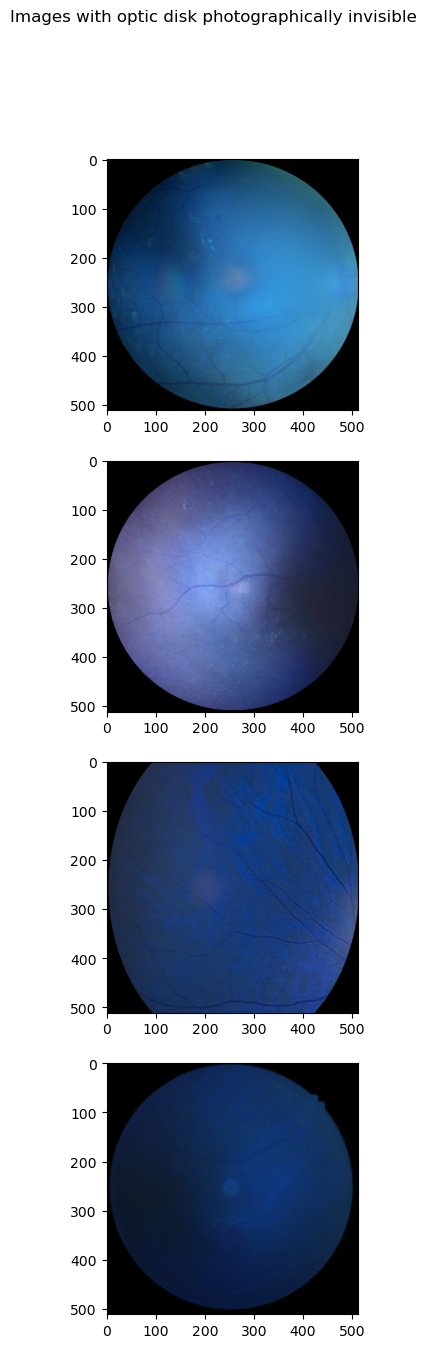

In [87]:
filenames_optic_disk_inv = df[(df['Left-Diagnostic Keywords'] == 'optic disk photographically invisible') | (df['Right-Diagnostic Keywords'] == 'optic disk photographically invisible')].filename
filenames_optic_disk_inv

fig, axs = plt.subplots(len(filenames_optic_disk_inv), figsize=(15,15))
fig.suptitle('Images with optic disk photographically invisible')
for i, filename in enumerate(filenames_optic_disk_inv):
    img_dir = './data/preprocessed_images/'
    img = cv2.imread(img_dir + filename)
    axs[i].imshow(img)

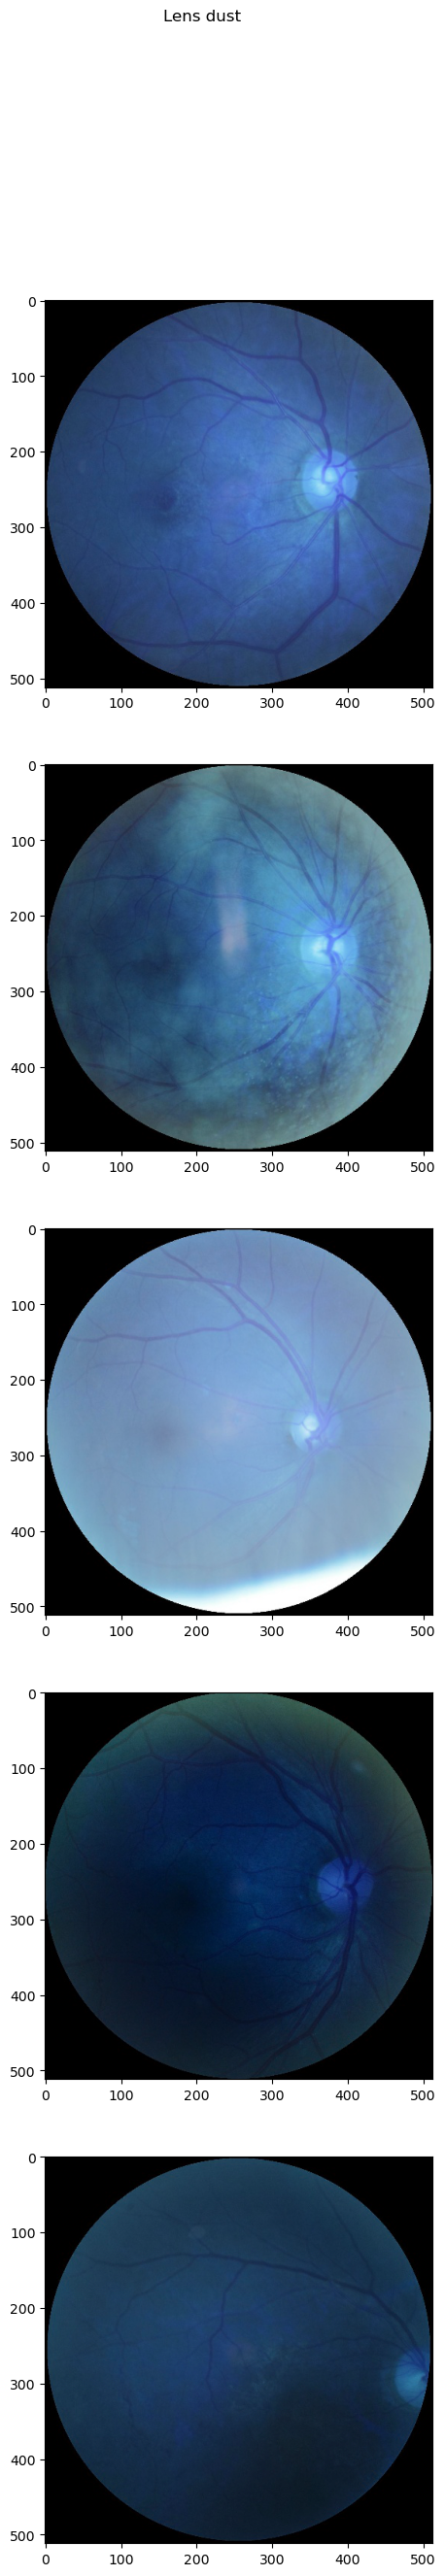

In [88]:
filenames_lens_dust = df[(df['Left-Diagnostic Keywords'].str.contains('lens dust') | (df['Right-Diagnostic Keywords'].str.contains('lens dust')))].filename
filenames_lens_dust

fig, axs = plt.subplots(len(filenames_lens_dust[:5]), figsize=(30,30))
fig.suptitle('Lens dust')
for i, filename in enumerate(filenames_lens_dust[:5]):
    img_dir = './data/preprocessed_images/'
    img = cv2.imread(img_dir + filename)
    axs[i].imshow(img)

### Delete invalid images

In [89]:
len(filenames_lens_dust) + len(filenames_optic_disk_inv)

229

In [102]:
to_del_imgs = df[df.filename.apply(lambda x: x in [*filenames_lens_dust, *filenames_optic_disk_inv])]
assert(len(to_del_imgs) == len(filenames_lens_dust) + len(filenames_optic_disk_inv))
to_del_imgs

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
53,65,56,Male,65_left.jpg,65_right.jpg,epiretinal membrane，lens dust,normal fundus,0,0,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",65_right.jpg
77,94,55,Male,94_left.jpg,94_right.jpg,normal fundus，lens dust,vitreous degeneration，mild nonproliferative re...,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['O'],"[0, 0, 0, 0, 0, 0, 0, 1]",94_right.jpg
103,122,50,Female,122_left.jpg,122_right.jpg,drusen，lens dust,normal fundus,0,0,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",122_right.jpg
155,183,55,Male,183_left.jpg,183_right.jpg,lens dust，vitreous degeneration,normal fundus,0,0,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",183_right.jpg
156,184,69,Male,184_left.jpg,184_right.jpg,normal fundus，lens dust,epiretinal membrane over the macula，moderate n...,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['O'],"[0, 0, 0, 0, 0, 0, 0, 1]",184_right.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5587,3292,57,Female,3292_left.jpg,3292_right.jpg,normal fundus,lens dust，normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",3292_left.jpg
5595,3300,60,Female,3300_left.jpg,3300_right.jpg,normal fundus，lens dust,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",3300_left.jpg
5617,3325,62,Male,3325_left.jpg,3325_right.jpg,normal fundus,lens dust，normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",3325_left.jpg
5659,3369,50,Female,3369_left.jpg,3369_right.jpg,normal fundus，lens dust,lens dust，normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",3369_left.jpg


In [ ]:
[*to_del_imgs.filename]

In [152]:
df_eye = df[df.filename.apply(lambda x: x not in [*to_del_imgs.filename])]
df_eye

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,4686,63,Male,4686_left.jpg,4686_right.jpg,severe nonproliferative retinopathy,proliferative diabetic retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4686_left.jpg
6388,4688,42,Male,4688_left.jpg,4688_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4688_left.jpg
6389,4689,54,Male,4689_left.jpg,4689_right.jpg,mild nonproliferative retinopathy,normal fundus,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4689_left.jpg
6390,4690,57,Male,4690_left.jpg,4690_right.jpg,mild nonproliferative retinopathy,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4690_left.jpg


In [153]:
assert(df_eye[(df_eye['Left-Diagnostic Keywords'].str.contains('lens dust')) | (df_eye['Right-Diagnostic Keywords'].str.contains('lens dust'))].size == 0)

### Directories

In [147]:
# The path to store trained models
models_dir = r'./models/' 
if not os.path.exists(models_dir):
    os.mkdir(models_dir)

# The path to the directory where is original dataset
original_dataset_dir = r'./data/preprocessed_images/'

# The directory where we will store our smaller dataset
base_dir = r'./dataset256/'
if not os.path.exists(base_dir):
    os.mkdir(base_dir)

split_dir = base_dir + r'split256/'
if not os.path.exists(split_dir):
    os.mkdir(split_dir)

# Prepare directories for the class separation
normal_dir = os.path.join(split_dir, r'normal256')
if not os.path.exists(normal_dir):
    os.mkdir(normal_dir)
    
diabetes_dir = os.path.join(split_dir, r'diabetes256')
if not os.path.exists(diabetes_dir):
    os.mkdir(diabetes_dir)
    
glaucoma_dir = os.path.join(split_dir, r'glaucoma256')
if not os.path.exists(glaucoma_dir):
    os.mkdir(glaucoma_dir)
    
cataract_dir = os.path.join(split_dir, r'cataract256')
if not os.path.exists(cataract_dir):
    os.mkdir(cataract_dir)
    
age_macular_dir = os.path.join(split_dir, r'age_macular256')
if not os.path.exists(age_macular_dir):
    os.mkdir(age_macular_dir)
    
hypertension_dir = os.path.join(split_dir, r'hypertension256')
if not os.path.exists(hypertension_dir):
    os.mkdir(hypertension_dir)
    
myopia_dir = os.path.join(split_dir, r'myopia256')
if not os.path.exists(myopia_dir):
    os.mkdir(myopia_dir)

other_dir = os.path.join(split_dir, r'other256')
if not os.path.exists(other_dir):
    os.mkdir(other_dir)

### Create data class for each disease

In [154]:
class DataClass():
    def __init__(self, _name: str, _filenames: [str], _target: [int], _abbreviation: str, _directory: str):
        self.name = _name
        self.filenames = _filenames
        self.target = _target
        self.abbreviation  = _abbreviation
        self.directory = _directory
        
    def __str__(self):
        return f"name: {self.name}\n" \
        f"filenames[:5]:\n {self.filenames[:5]}\n" \
        f"target: {self.target[:8]}\n"\
        f"abbrevation: {self.abbreviation}\n" \
        f"directory: {self.directory}"
    
    def __repr__(self):
        return f"name: {self.name}\n" \
        f"filenames[:5]:\n {self.filenames[:5]}\n" \
        f"target: {self.target[:8]}\n"\
        f"abbrevation: {self.abbreviation}\n" \
        f"directory: {self.directory}"

# THAT'S WRONG! THIS LABEL IS ATTACHED TO EACH PATIENT NOT TO EACH EYE! nvm it's correct 
normal_filenames = df_eye[df_eye.labels == "['N']"].filename.values
diabetes_filenames = df_eye[df_eye.labels == "['D']"].filename.values
glaucoma_filenames = df_eye[df_eye.labels == "['G']"].filename.values
cataract_filenames = df_eye[df_eye.labels == "['C']"].filename.values
age_macular_filenames = df_eye[df_eye.labels == "['A']"].filename.values
hypertension_filenames = df_eye[df_eye.labels == "['H']"].filename.values
myopia_filenames = df_eye[df_eye.labels == "['M']"].filename.values
other_filenames = df_eye[df_eye.labels == "['O']"].filename.values

normal_class = DataClass('normal', normal_filenames, [1, 0, 0, 0, 0, 0, 0, 0], 'N', normal_dir)
diabetes_class = DataClass('diabetes', diabetes_filenames, [0, 1, 0, 0, 0, 0, 0, 0], 'D', diabetes_dir)
glaucoma_class = DataClass('glaucoma', glaucoma_filenames, [0, 0, 1, 0, 0, 0, 0, 0], 'G', glaucoma_dir)
cataract_class = DataClass('cataract', cataract_filenames, [0, 0, 0, 1, 0, 0, 0, 0], 'C', cataract_dir)
age_macular_class = DataClass('age_macular', age_macular_filenames, [0, 0, 0, 0, 1, 0, 0, 0], 'A', age_macular_dir)
hypertension_class = DataClass('hypertension', hypertension_filenames, [0, 0, 0, 0, 0, 1, 0, 0], 'H', hypertension_dir)
myopia_class = DataClass('myopia', myopia_filenames, [0, 0, 0, 0, 0, 0, 1, 0], 'M', myopia_dir)
other_class = DataClass('other', other_filenames, [0, 0, 0, 0, 0, 0, 0, 1], 'O', other_dir)

data_classes = [
    normal_class, 
    diabetes_class, 
    glaucoma_class, 
    cataract_class, 
    age_macular_class, 
    hypertension_class, 
    myopia_class, 
    other_class
]

In [160]:
# save updated df to csv file
df_eye.to_csv('./data/df_eye.csv')

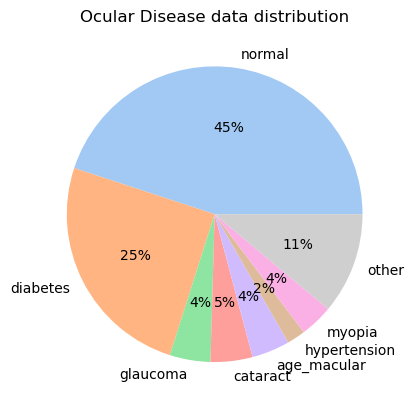

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt

colors = sns.color_palette('pastel')[0:len(classes)]

plt.pie(num_of_imgs, labels = classes, colors = colors, autopct='%.0f%%')
plt.title('Ocular Disease data distribution')
plt.show()

### Resize images to 256x256 resolution 

Before: (512, 512, 3)
After: (256, 256, 3)


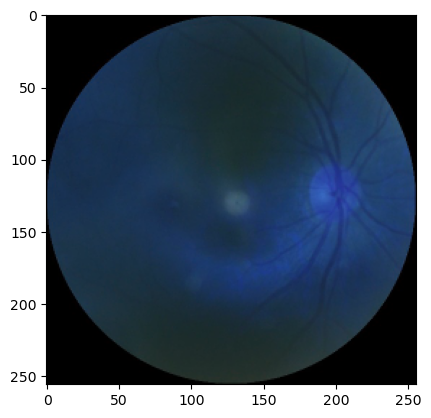

In [149]:
# sample code for resizing
img = cv2.imread('./data/preprocessed_images/0_right.jpg')
print(f"Before: {img.shape}")
img256 = cv2.resize(img, (256, 256))
plt.imshow(img256)
print(f"After: {img256.shape}")

In [150]:
# Copy files to each class dir
for data_class in data_classes:
    class_dir = data_class.directory
    if os.path.exists(class_dir) and not os.path.isfile(class_dir):
        # Check if the directory is empty
        if not os.listdir(class_dir):
            # copy files
            for fname in data_class.filenames:
                src = os.path.join(original_dataset_dir, fname)
                img = cv2.imread(src)
                # resize img to 256x256
                resized_img = cv2.resize(img, (256, 256))
                # save scaled img
                dst = data_class.directory + "/" + fname
                cv2.imwrite(dst, resized_img)
                # shutil.copyfile(src, dst)
    # validate if number of each class in dataframe and destination directory is the same
    assert(len(df_eye[df_eye.labels == "['" + data_class.abbreviation +  "']"]) == len(os.listdir(class_dir)))